<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Digital_Transformation_Supply_Chain_biblio_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os

path = '/content/drive/MyDrive/EnANPAD/'
files = os.listdir(path)

for f in files:
  if ('Scopus' in f) and ('Year' in f):
    print(f.split('Year-')[1].split('.csv')[0])

DT-SC
DT-SC-SEM
DT-SC-model
DT-SC-model-Decision
IoT
BigData
RFID
Cloud
ML
DigitalTwins
DeepLearning
3Dprint
Robots
DataAnalytics
Blockchain
Mobile
AI


In [3]:
df = pd.DataFrame()

for f in files:
  if ('Scopus' in f) and ('Year' in f):
    data = pd.read_csv(path + f,skiprows=7)
    data.columns = ['YEAR','COUNT']
    data['Search'] = f.split('Year-')[1].split('.csv')[0]
    data['Engine'] = 'Scopus'
    data = data[['Engine', 'Search', 'YEAR', 'COUNT']]
    df = pd.concat([df,data])

df.head()


,Engine,Search,YEAR,COUNT
0,Scopus,DT-SC,2023,94
1,Scopus,DT-SC,2022,251
2,Scopus,DT-SC,2021,150
3,Scopus,DT-SC,2020,110
4,Scopus,DT-SC,2019,38


In [4]:
# df = pd.DataFrame()

for f in files:
  if ('webofscience' in f) and ('year' in f):
    data = pd.read_csv(path + f,sep='\t')
    data.columns = ['YEAR','COUNT','Percent']
    data['Search'] = f.split('webofscience-')[1].split('-year.txt')[0]
    data['Engine'] = 'WebOfScience'
    data = data[['Engine', 'Search', 'YEAR', 'COUNT']]
    data = data.dropna()
    data['COUNT'] = data['COUNT'].astype(int)
    df = pd.concat([df,data])

df['YEAR'] = df['YEAR'].astype(int)
df.head()

,Engine,Search,YEAR,COUNT
0,Scopus,DT-SC,2023,94
1,Scopus,DT-SC,2022,251
2,Scopus,DT-SC,2021,150
3,Scopus,DT-SC,2020,110
4,Scopus,DT-SC,2019,38


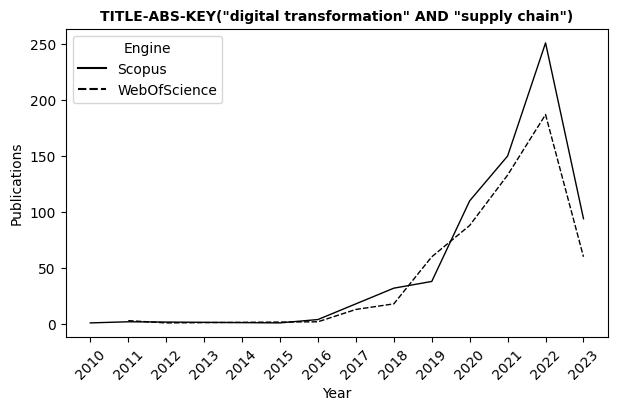

In [5]:
plt.figure(figsize=(7,4))

mask = ((df.Search == 'DT-SC') & (df.YEAR >= 2010))
sns.lineplot(x='YEAR',y='COUNT',data=df[mask],hue='Engine',style='Engine',palette=['black', 'black'],lw=1)

plt.title('TITLE-ABS-KEY("digital transformation" AND "supply chain")',fontsize=10,weight='bold')
plt.xlabel('Year')
plt.ylabel('Publications')
plt.xticks(np.arange(df[mask].YEAR.min(),df[mask].YEAR.max()+1,1),rotation=45)
plt.show()

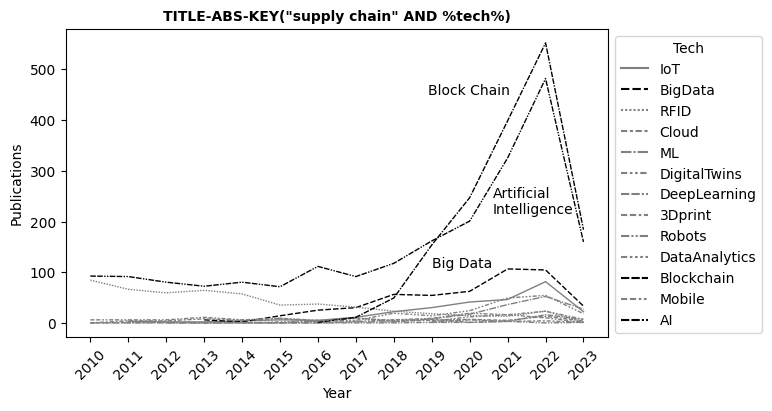

In [6]:
plt.figure(figsize=(7,4))

s = [ x for x in df.Search.unique() if 'DT-SC' not in x ]

mask = ((df.Engine == 'Scopus') & (df.YEAR >= 2010) & (df.Search.isin(s)))
color = {}
for x, y in zip(s,['gray']*(len(s)-1)):
  color[x] = y

color['AI'] = 'black'  
color['Blockchain'] = 'black'  
color['BigData'] = 'black'  

color.values()

sns.lineplot(x='YEAR',y='COUNT',data=df[mask],hue='Search',style='Search',palette=color.values(),lw=1)

plt.title('TITLE-ABS-KEY("supply chain" AND %tech%)',fontsize=10,weight='bold')
plt.xlabel('Year')
plt.ylabel('Publications')
plt.xticks(np.arange(df[mask].YEAR.min(),df[mask].YEAR.max()+1,1),rotation=45)
plt.legend(title='Tech',loc = 2, bbox_to_anchor = (1,1))
plt.text(2020.6,215,'Artificial\nIntelligence')
plt.text(2018.9,450,'Block Chain')
plt.text(2019,110,'Big Data')
plt.show()

In [7]:
df.Search.unique()

array(['DT-SC', 'DT-SC-SEM', 'DT-SC-model', 'DT-SC-model-Decision', 'IoT',
       'BigData', 'RFID', 'Cloud', 'ML', 'DigitalTwins', 'DeepLearning',
       '3Dprint', 'Robots', 'DataAnalytics', 'Blockchain', 'Mobile', 'AI',
       'AI-SC'], dtype=object)

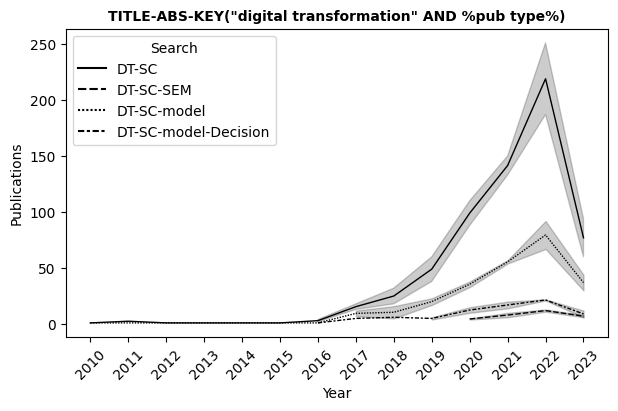

In [8]:
fig, ax = plt.subplots(figsize=(7,4))

s = [ x for x in df.Search.unique() if (('DT-SC' in x) )]
mask = ((df.YEAR >= 2010) & (df.Search.isin(s)))
sns.lineplot(x='YEAR',y='COUNT',data=df[mask],hue='Search',style='Search',palette=['black']*len(df[mask].Search.unique()), lw=1,ax=ax)

ax.set_title('TITLE-ABS-KEY("digital transformation" AND %pub type%)',fontsize=10,weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Publications')
ax.xaxis.set_ticks(np.arange(df[mask].YEAR.min(),df[mask].YEAR.max()+1,1))
ax.set_xticklabels(np.arange(df[mask].YEAR.min(),df[mask].YEAR.max()+1,1),rotation=45)

plt.show()

In [25]:
df = pd.DataFrame()

for f in files:
  if ('Scopus' in f) and ('Subject' in f):
    # print(f)
    data = pd.read_csv(path + f,skiprows=7)
    data.columns = ['SUBJECT AREA','COUNT']
    # data['Engine'] = 'Scopus'
    data = data[['SUBJECT AREA', 'COUNT']]
    df = pd.concat([df,data])

display(df.head(10))

df['SUBJECT AREA'] = df['SUBJECT AREA'].replace('Business, Management and Accounting','Business and Management')
df['SUBJECT AREA'] = df['SUBJECT AREA'].replace('Economics, Econometrics and Finance','Economics and Finance')

df['COLOR'] = 'lightgrey'

df.at[1,'COLOR'] = 'grey'
df.at[2,'COLOR'] = 'grey'
df.at[3,'COLOR'] = 'grey'
df.at[6,'COLOR'] = 'grey'
df = df[['COLOR', 'SUBJECT AREA', 'COUNT']]
df.head()

import plotly.express as px

fig = px.treemap(df, path=['SUBJECT AREA'],values='COUNT', width=800, height=400)
fig.update_layout(
    treemapcolorway = df['COLOR'],
#    treemapcolorway = ["lightgrey"]*(len(df)-1),
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False
fig.show()

,SUBJECT AREA,COUNT
0,Computer Science,297
1,Engineering,292
2,"Business, Management and Accounting",289
3,Decision Sciences,188
4,Social Sciences,101
5,Environmental Science,83
6,"Economics, Econometrics and Finance",79
7,Energy,71
8,Mathematics,61
9,Earth and Planetary Sciences,24


In [24]:
df = pd.DataFrame()

for f in files:
  if ('Scopus' in f) and ('Country' in f):
    # print(f)
    data = pd.read_csv(path + f,skiprows=7)
    data.columns = ['COUNTRY/AREA','COUNT']
    # data['Engine'] = 'Scopus'
    data = data[['COUNTRY/AREA', 'COUNT']]
    df = pd.concat([df,data])

display(df.head(12))

df['COLOR'] = 'lightgrey'

df.at[0,'COLOR'] = 'grey'
df.at[1,'COLOR'] = 'grey'
df.at[2,'COLOR'] = 'grey'
df.at[3,'COLOR'] = 'grey'
df.at[4,'COLOR'] = 'grey'
df.at[11,'COLOR'] = 'grey'
df = df[['COLOR', 'COUNTRY/AREA', 'COUNT']]
df.head()

df = df[df.COUNT >= 5]

import plotly.express as px

fig = px.treemap(df, path=['COUNTRY/AREA'],values='COUNT', width=800, height=400, maxdepth = -1) # , title='Publications by Country')
fig.update_layout(
    treemapcolorway = df['COLOR'],
#    treemapcolorway = ["lightgrey"]*(len(df)-1),
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False
fig.show()

,COUNTRY/AREA,COUNT
0,China,72
1,United States,69
2,Germany,68
3,United Kingdom,59
4,India,55
5,Russian Federation,53
6,Italy,49
7,France,34
8,Australia,23
9,Morocco,23
